# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# **Load the product_sales Data:**

# NewProduct Sales Methods 
Six weeks ago we launched a newline of office stationery. Despite the world becoming increasingly digital, there is still demand for notebooks, pens and sticky notes. Our focus has been on selling products to enable our customers to be more creative, focused on tools for brainstorming. We have tested three different sales strategies for this, targeted email and phone calls, as well as combining the two. 

**Email**: Customers in this group received an email when the product line was launched, and a further email three weeks later. This required very little work for the team. 

**Call**: Customers in this group were called by a member of the sales team. On average membersofthe teamwereonthephoneforaroundthirty minutes per customer.

**Email and call**: Customers in this group were first sent the product information email, then called a week later by the sales team to talk about their needs and how this new product maysupport their work. The email required little work from the team, the call was around ten minutes per customer.

### **Company need to know:-**

- **How many customers were there for each approach?**
- **What does the spread of the revenue look likeoverall? And for each method?**
- **Was there any difference in revenue overtime for each of the methods?**
- **Based on the data, which method would you recommend we continue to use?Some of these methods takemore time from the team so they maynot be the best for us to use if the results are similar.**

In [1]:
# load the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("product_sales.csv")
print(df.shape)

#finnd null values
print(df.isnull().sum())

#find unique in sales_method
print(df.nunique())
print(df['sales_method'].unique())

(15000, 8)
week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64
week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64
['Email' 'Email + Call' 'Call' 'em + call' 'email']


In [2]:
df['sales_method'] = df['sales_method'].replace({'em + call':'Email + Call', 'email':'Email'})
print(df['sales_method'].unique())

df.head(100)

['Email' 'Email + Call' 'Call']


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
95,1,Email,172fcd47-62ac-4976-bac7-6934464a8c5c,8,81.98,0,23,Arizona
96,4,Call,750b0907-f87d-4c4e-95bf-de9952fb22c1,11,53.08,5,27,Kentucky
97,4,Call,8185cdfd-0b66-4ea3-aa77-c9e4d64f2b52,10,51.82,0,27,Ohio
98,5,Email + Call,b70489e0-d3d4-494d-b4c9-fa7f71ba4b21,12,185.65,1,27,Michigan


# **Data validation**
The original dataset contains **15000 rows and 8 columns** before cleaning and validation. I have validated all the columns against the criteria in the dataset table:
1. **week:** 6 unique values, from 1 to 6. No cleaning is needed.

2. **sales_method:** 3 unique methods including Call, Email and Email+Call, with 23 values like as “em + call” and 10 values like as “email” were corrected.

3. **customer_id:** character variable without missing values, same as the description. No cleaning is needed.

4. **nb_sold:** 10 numeric categories without missing values from 7 to 16, same as the description. No cleaning is needed.
 
5. **revenue:** numeric values with 1074 missing values.

6. **years_as_customer:** numeric values with a 2 outliers identified as a customer with 47 and 63 years as customer. 7. However, the store has been in existence for 39 years, since 1984.

7. **nb_site_visits:** numeric values without missing values, same as the description. No cleaning is needed.

8. s**tate:** 50 possible values without missing values, same as the description. No cleaning is needed.

# **Exploratory Analysis:**
### The distribution of customers by years of customer reveals a concentration of customers who buy in the store within a period of up to 5 years, with a normal distribution and positive skewness. However, there is a significant amount of customers who have been customers for between 6 and 20 years.

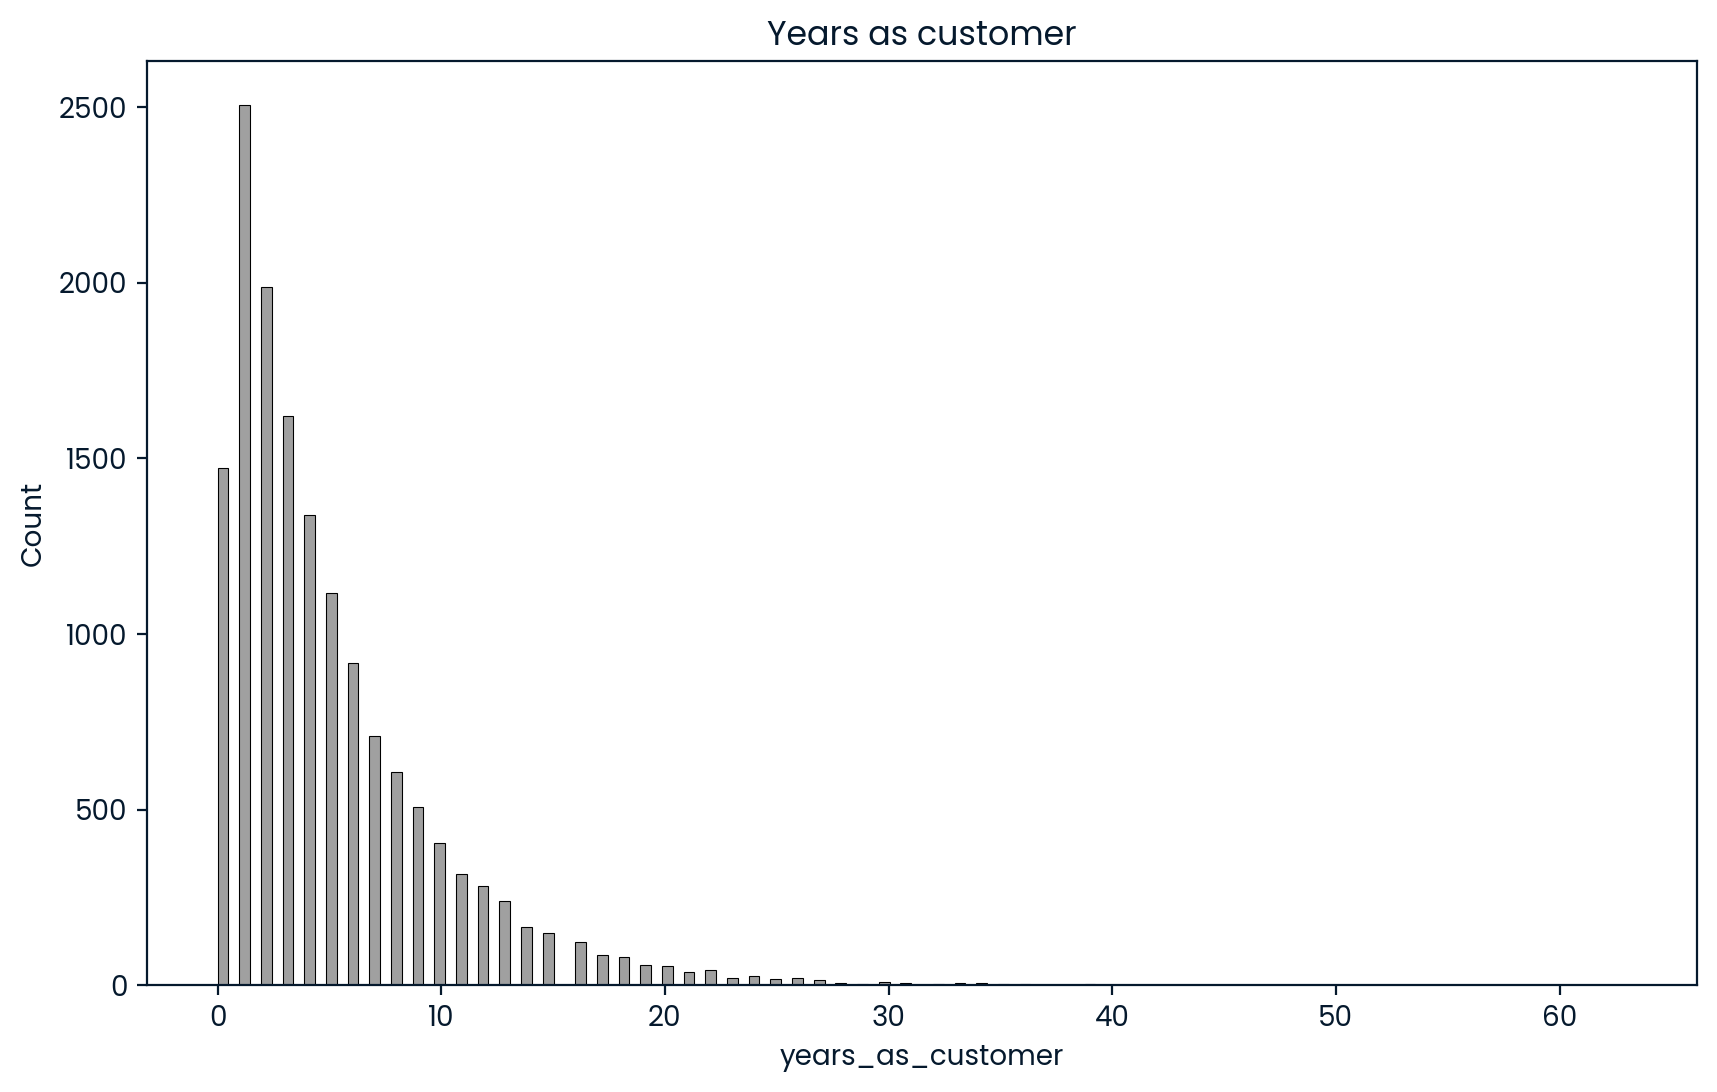

In [3]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x="years_as_customer", color="gray")
plt.title('Years as customer')

plt.show()

### The distribution of visits to the site is very close to the normal distribution, with an arithmetic average of 25 visits per customer in the last 6 months. Over 1600 customers exhibited this average behavior with over 90% of customers having visited the site between 15 and 35 times. Likewise, from the observed distribution, it is possible to state that around 5000 customers visited the site between 24 and 26 times in the period of 6 months.

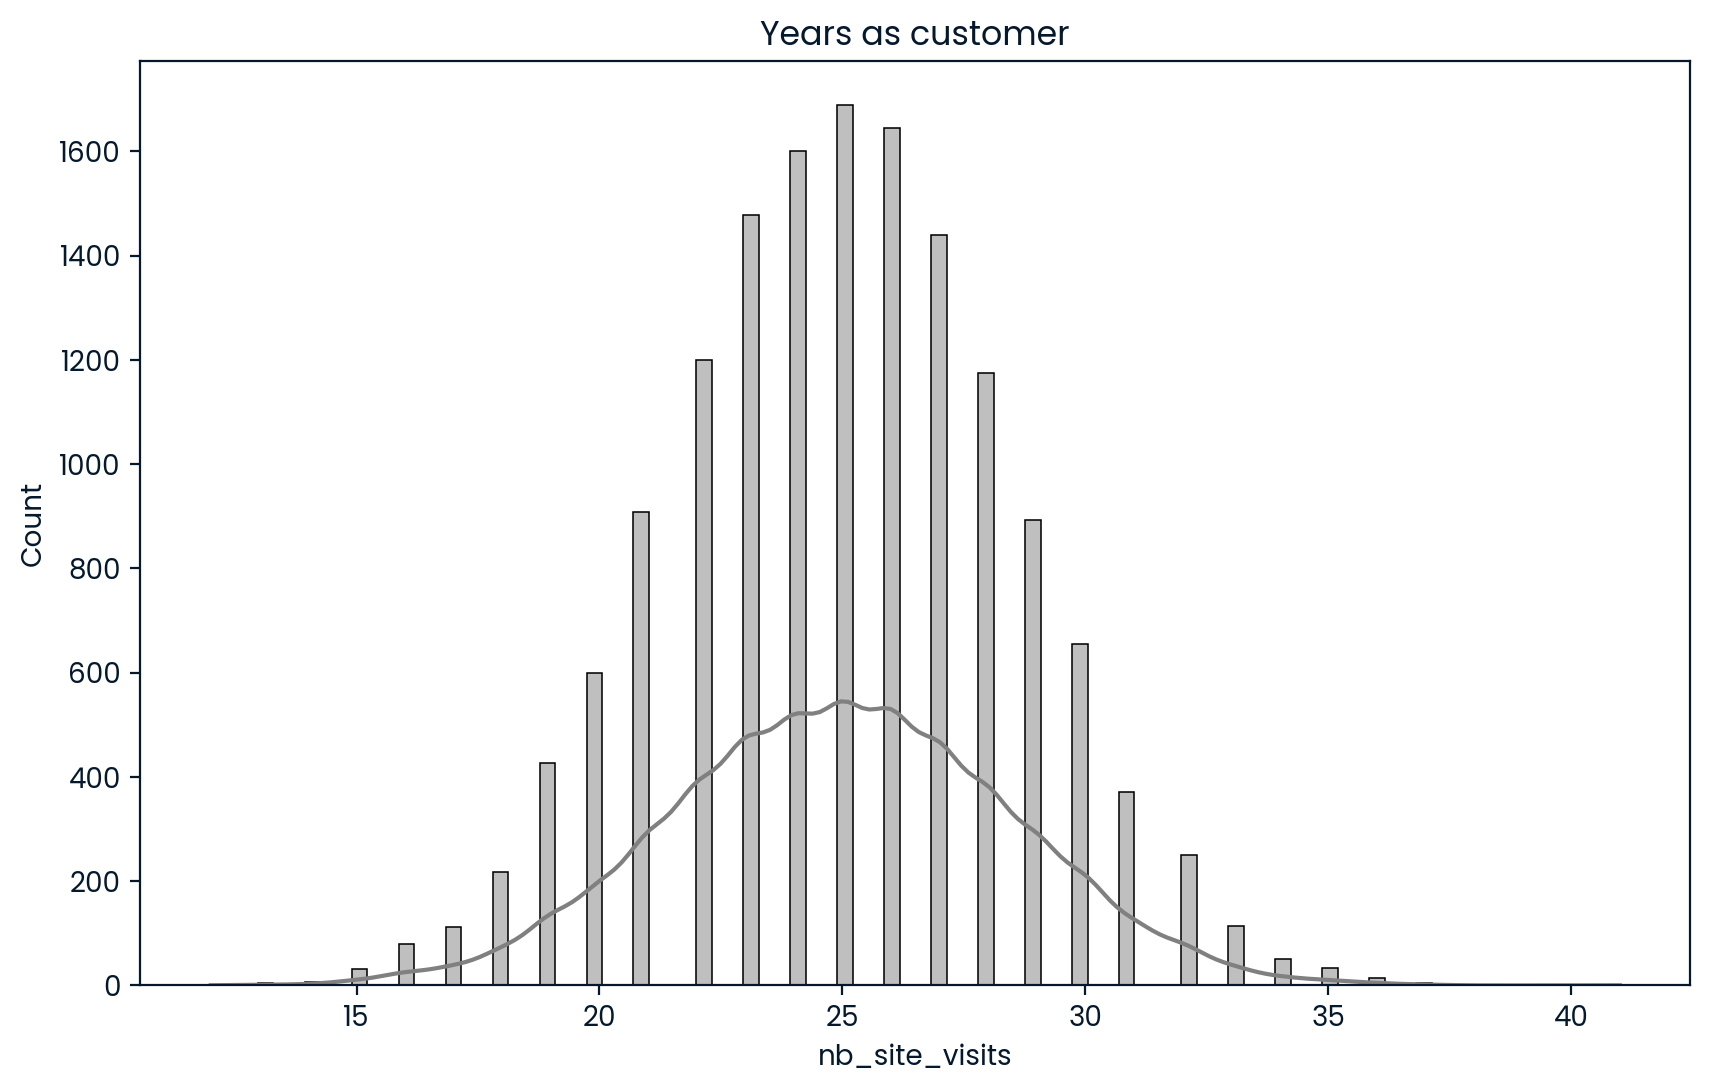

In [4]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x="nb_site_visits", color="gray", kde=True, stat='count')
plt.title('Years as customer')
plt.show()

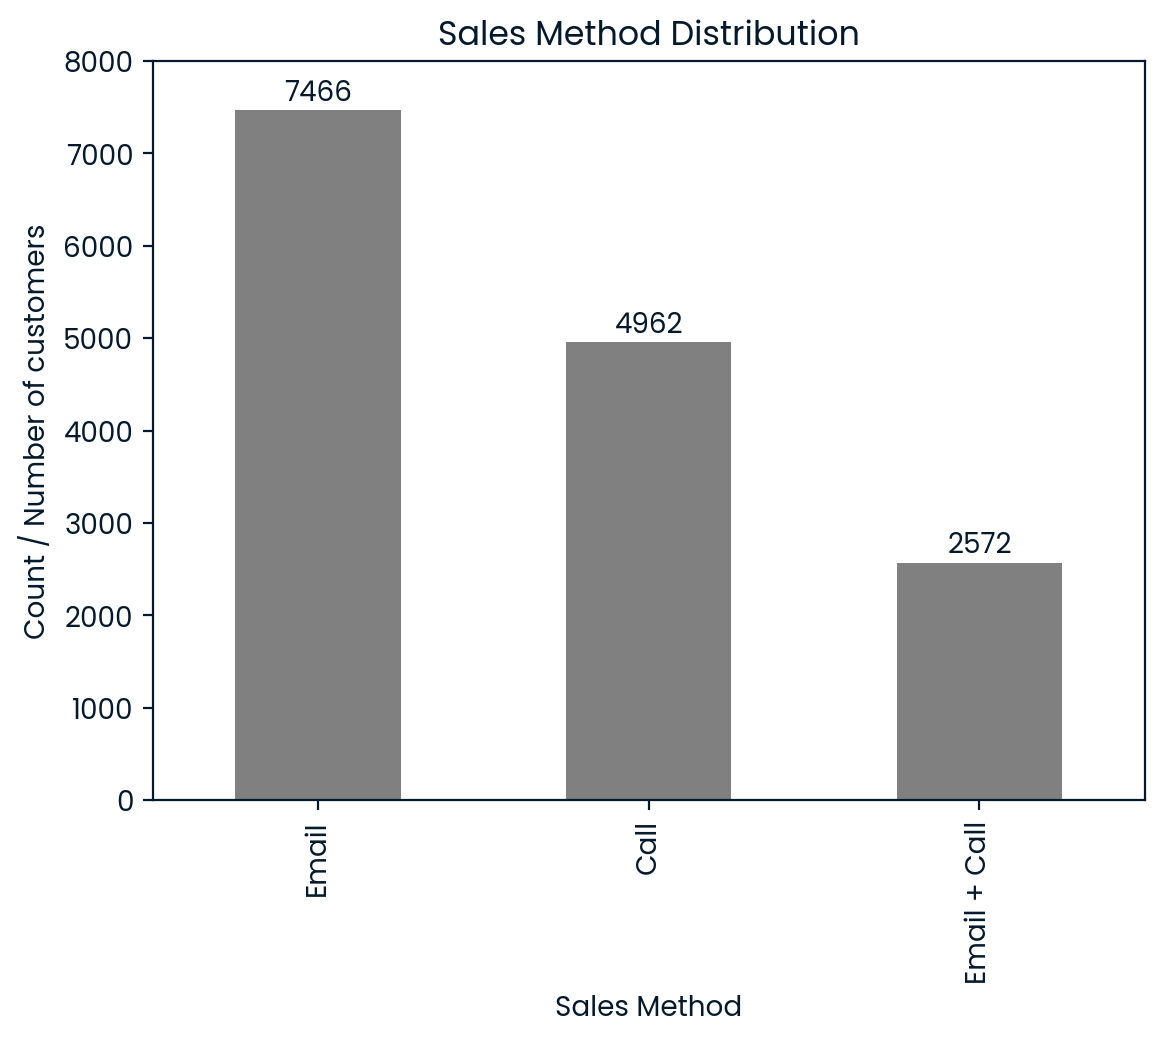

In [5]:
ax = df['sales_method'].value_counts().plot(kind='bar', title='Sales Method Distribution', color="gray")
ax.bar_label(ax.containers[0], padding=1)
ax.set_ylim(0, 8000)
ax.set_xlabel("Sales Method")
ax.set_ylabel("Count / Number of customers")
plt.show()

## **How many customers were there for each approach?**
### The bar chart showing the sales methods indicates that the method that obtained the best results was Email, with 7,465 sales, followed by the Call method with 4,961 sales and, finally, the method that combines Email + Call with 2,572 sales. It is important to emphasize the proportion between sales made through the Email method, which represent around 50% of sales made.

## What does the spread of the revenue look like overall? And for each method?
### The Boxplot chart of revenue spread indicates a median value close to but below 100.00. The interquartile range reveals an approximate concentration of revenues per customer between 50.00 and 100.00 with values that can be considered outliers greater than 190.00.

Text(0.5, 1.0, 'Revenue distribution')

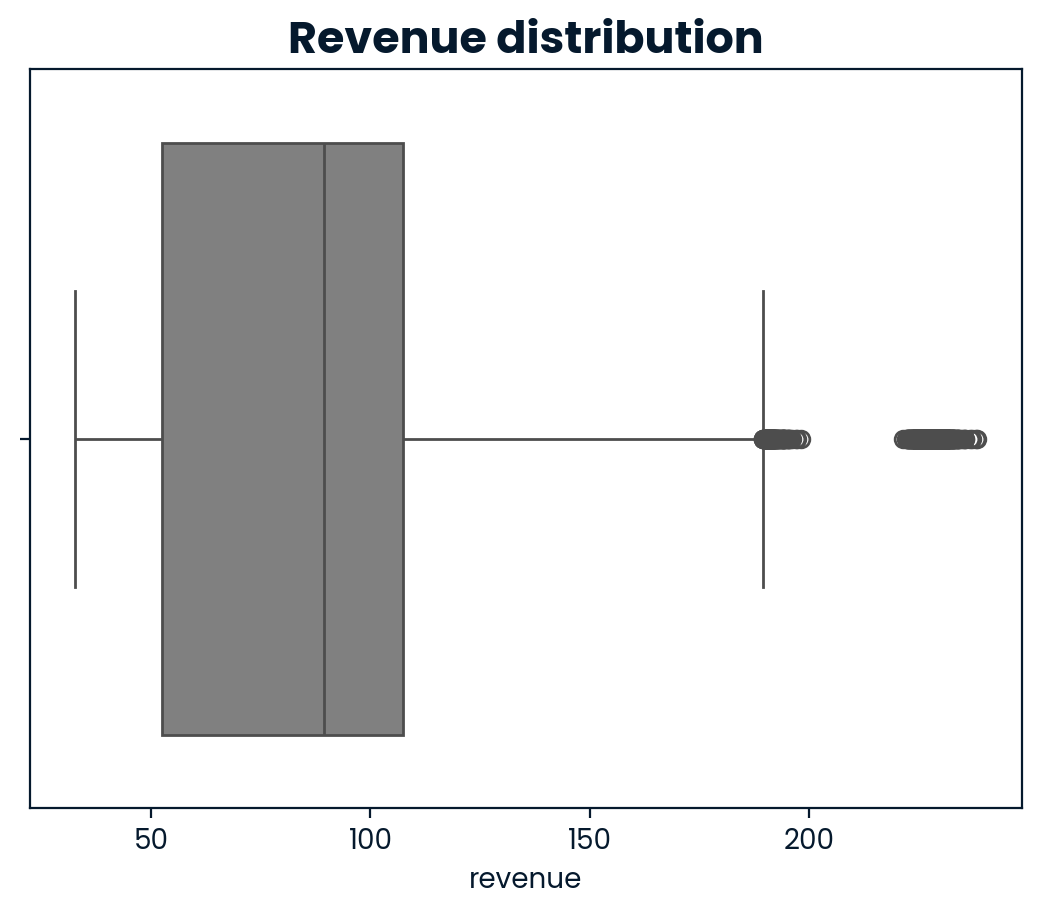

In [6]:
sns.boxplot(x=df["revenue"], color="gray").set_title('Revenue distribution', fontdict={'size': 16, 'weight': 'bold'})

**In the revenue histogram it is possible to notice two concentrations of sales around 50.00 and 100.00 considerably with a wider spread around this last value. However, around purchases worth 50.00 it is possible to identify a peak of 1600 customers. In the same way, it is possible to detect two niches of customers with higher expenses per purchase, around 180.00 and 230.00 per purchase.**

Text(0.5, 1.0, 'Revenue distribution')

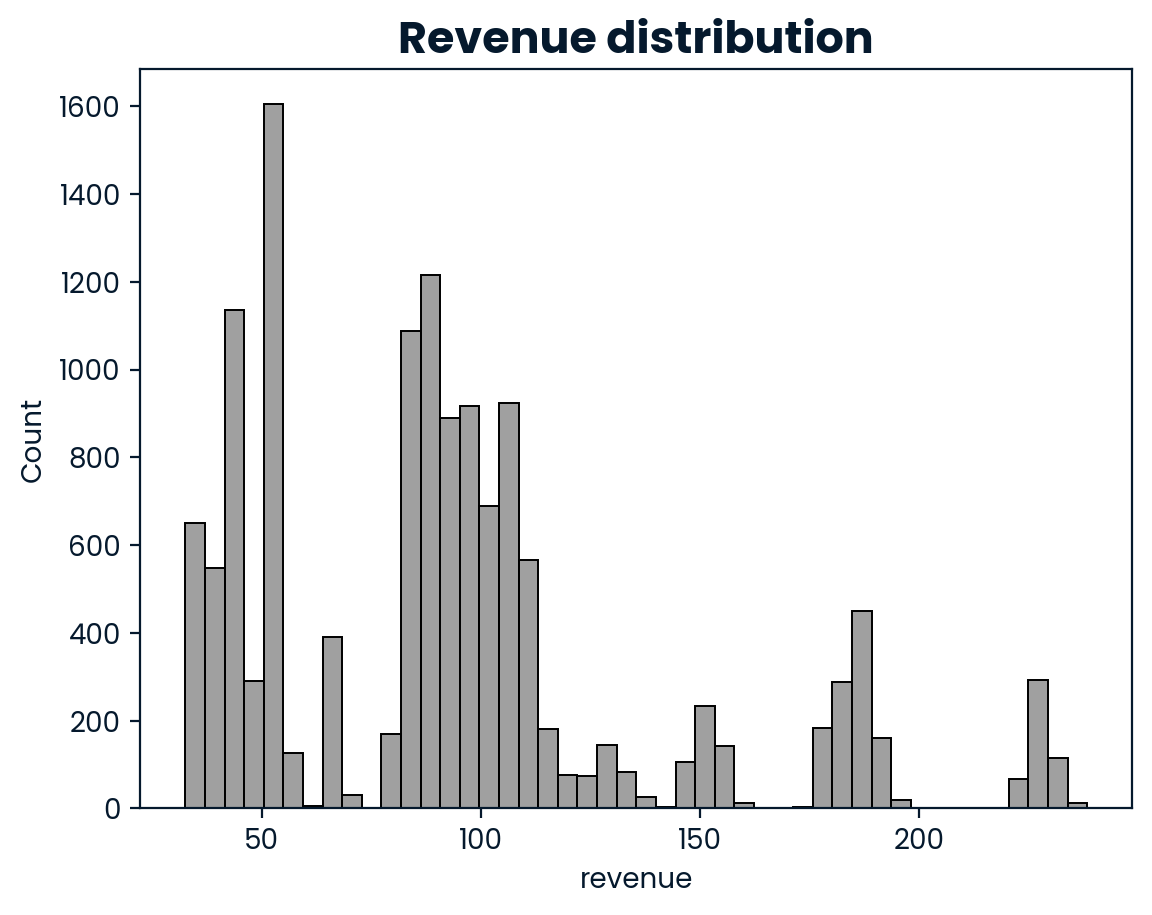

In [7]:
sns.histplot(data=df, x="revenue", color="gray").set_title('Revenue distribution', fontdict={'size': 16, 'weight': 'bold'})

**When we analyze the distribution of revenues by sales method, it is possible to highlight the differences through their medians or even their spread. The Email + Call method stands out for its wider spread and higher median, around 190.00. The Call method is distinguished by a narrow spread and a low median of around 50.00 only. In an intermediate role is the Email sales method with a narrow spread and a higher median than the Call method, around 90.00.**

Text(0.5, 1.0, 'Revenue per Sales Method')

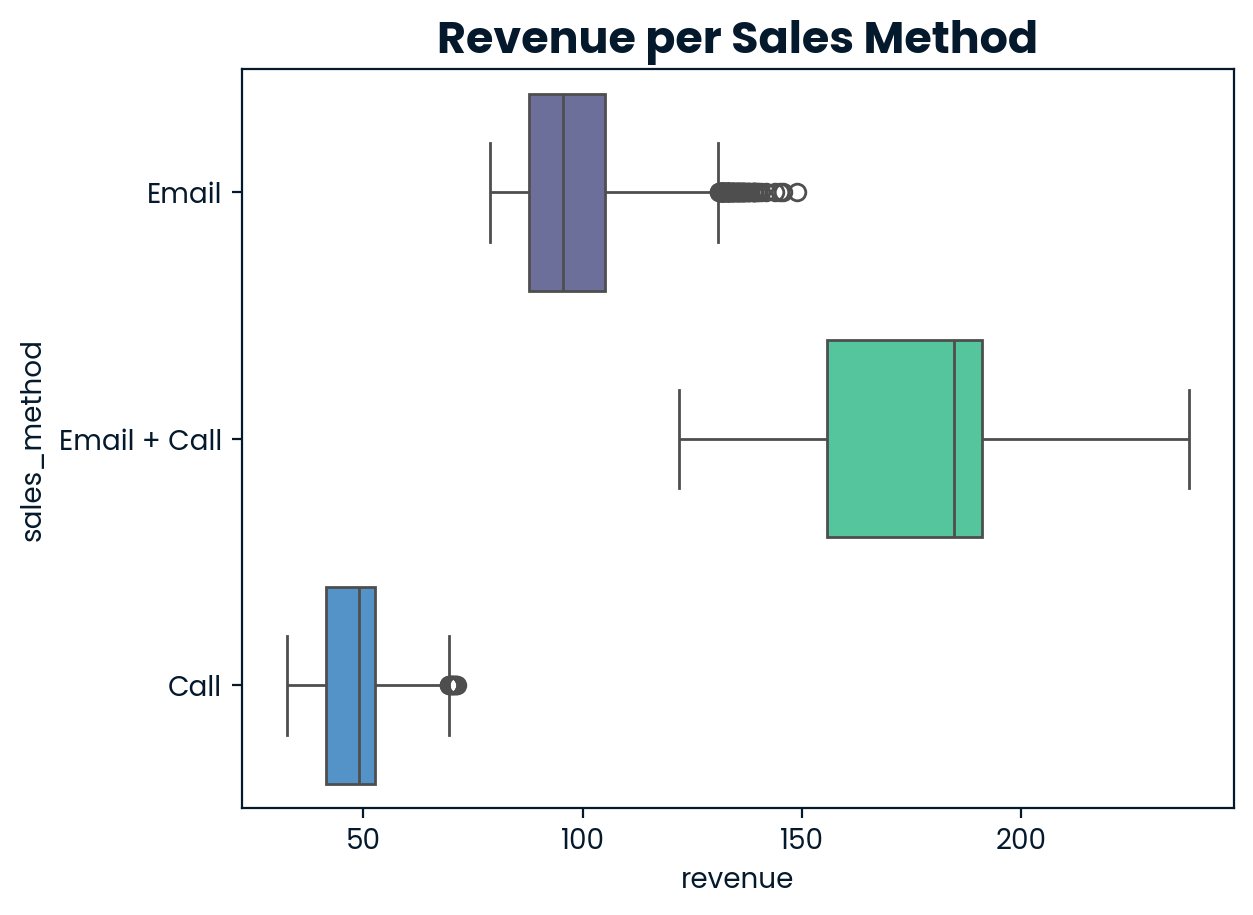

In [8]:
sns.boxplot(x="revenue", y="sales_method", hue="sales_method", data=df).set_title('Revenue per Sales Method', fontdict={'size': 16, 'weight': 'bold'})

## Was there any difference in revenue over time for each of the methods
**The analysis of revenue over time per each method indicates a smooth growth of the Call type sales method. As for the Email method, the data also indicate an increasing oscillation in a smooth way. However, in the Email+Call method it is possible to notice a more accentuated growth in revenue results, being always superior to the Email and Call methods.**

Text(0.5, 1.0, 'Revenue over time for each method')

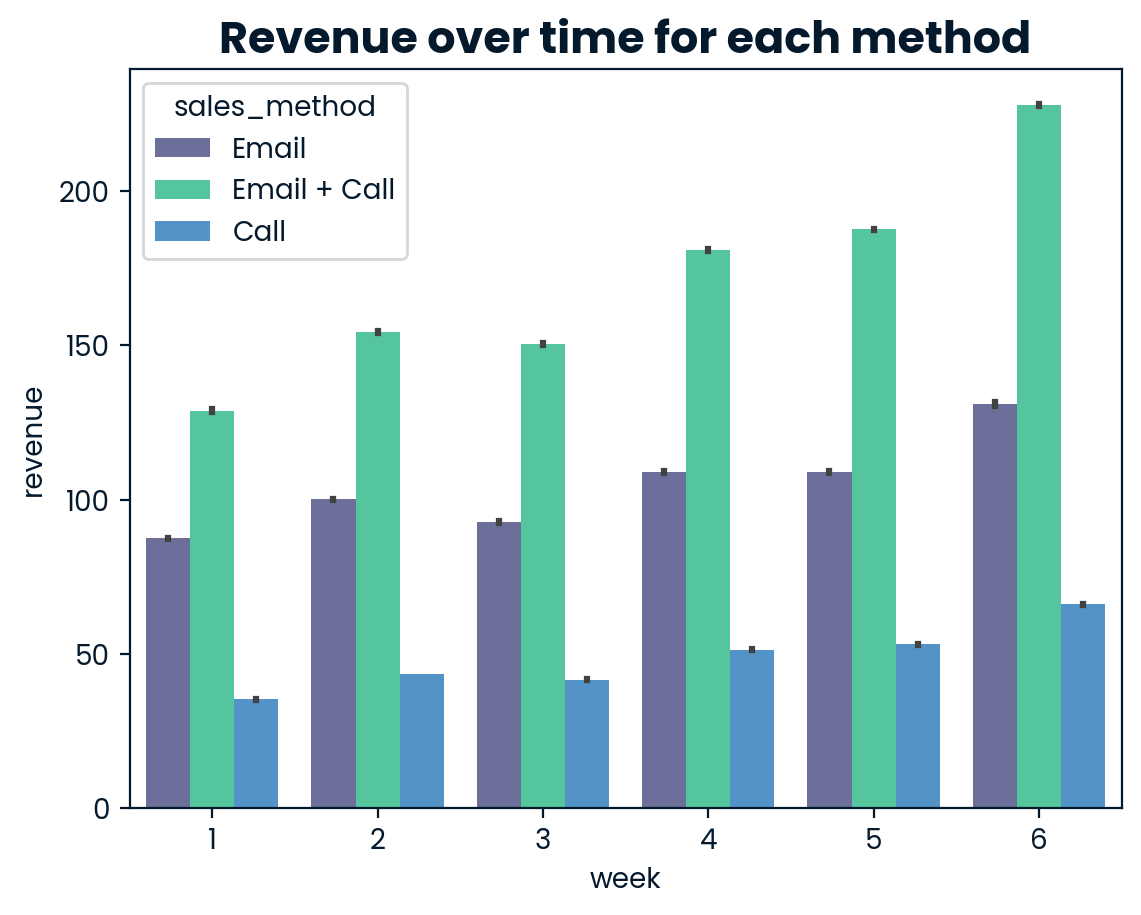

In [9]:
sns.barplot(data=df, x="week", y="revenue", hue="sales_method").set_title('Revenue over time for each method', fontdict={'size': 16, 'weight': 'bold'})

Text(0.5, 1.0, 'Revenue with no of sold for each method')

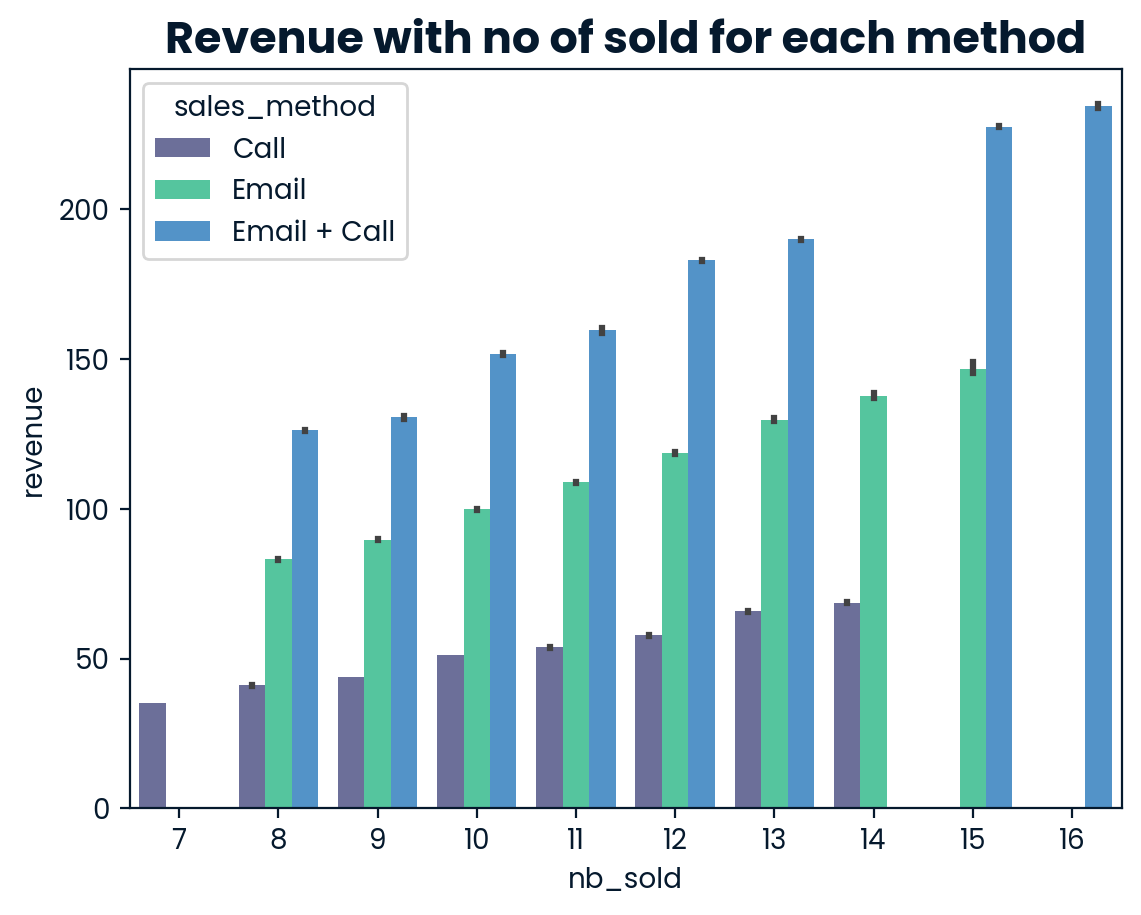

In [14]:
sns.barplot(data=df, x="nb_sold", y="revenue", hue="sales_method").set_title('Revenue with no of sold for each method', fontdict={'size': 16, 'weight': 'bold'})

# Definition of a metric for the business to monitor
- ###  How should the business monitor what they want to achieve? 
  **Metric: Revenue per Customer Contact Minute(RPCM):  is the average revenue generated per minute spent on customer contact. This metric helps evaluate the efficiency of different sales methods by considering both the revenue generated and the time invested.**
- ###  Estimate the initial value(s) for the metric based on the current data?
1. **Efficiency Evaluation: Use RPCM to compare the efficiency of different sales methods. Higher RPCM indicates a more efficient method, as it generates more revenue per minute of customer contact.**
2. **Resource Allocation: Allocate resources (e.g., sales team time) to the methods with higher RPCM to maximize revenue without overburdening the team.**
3. **Performance Tracking: Regularly track RPCM to monitor the performance of sales strategies over time. Identify any changes in efficiency and adjust strategies accordingly.**
4. **Decision Making: Use RPCM to make informed decisions about which sales methods to continue, scale, or discontinue based on their efficiency.**

# Conclusions
**As our aim is to increase product sales to enable our customers to be more creative, focused in brainstorming tools, I recommend that we use the percentage of sales made by the Email + Call method in the last six weeks as our metric, where the email required little work from the team and the call was around ten minutes per customer according to the data analyzed from the last six weeks with the new products launched .**

**Based on our data for the last 6 months, almost 50% of new products were sold via the Email + Call method. So, if that number increases in the next 6 months, that indicates a very good sign to reach our goal.**

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation